In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.tree as tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
url="https://drive.google.com/file/d/1w_61VqgSTv6imp6aIuyZNKdSxxVyci4l/view?usp=share_link"
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
dataset = pd.read_csv(dwn_url)
dataset.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.0,F,HIGH,HIGH,25.355,drugY
1,47.0,M,LOW,HIGH,13.093,drugC
2,47.0,M,LOW,HIGH,10.114,drugC
3,NaN,F,NORMAL,HIGH,NaN,drugX
4,61.0,F,LOW,HIGH,18.043,drugY
5,22.0,F,NORMAL,HIGH,8.607,drugX
6,49.0,F,NORMAL,HIGH,16.275,drugY
7,NaN,M,LOW,HIGH,11.037,drugC
8,60.0,M,NORMAL,HIGH,15.171,drugY
9,43.0,M,LOW,NORMAL,19.368,drugY


In [ ]:
#PreProcessing the data

In [3]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset['Na_to_K'] = dataset['Na_to_K'].fillna(dataset['Na_to_K'].mean())
dataset['Sex']= np.select([dataset['Sex'] == 'F', dataset['Sex'] == 'M'],[1, 0], default=np.nan)
dataset['BP'] = np.select([dataset['BP']== 'LOW', dataset['BP'] == 'NORMAL',dataset['BP']=='HIGH'],[0,1,2], default=np.nan)
dataset['Cholesterol']=np.select([dataset['Cholesterol']=='NORMAL',dataset['Cholesterol']=='HIGH'],[0,1],default=np.nan)
dataset['Drug']=np.select([dataset['Drug']=='drugA',dataset['Drug']=='drugB',dataset['Drug']=='drugC',dataset['Drug']=='drugX',dataset['Drug']=='drugY'],[0,1,2,3,4],default=np.nan)
dataset

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.000000,1.0,2.0,1.0,25.355000,4.0
1,47.000000,0.0,0.0,1.0,13.093000,2.0
2,47.000000,0.0,0.0,1.0,10.114000,2.0
3,45.121693,1.0,1.0,1.0,16.564952,3.0
4,61.000000,1.0,0.0,1.0,18.043000,4.0
...,...,...,...,...,...,...
195,56.000000,1.0,0.0,1.0,11.567000,2.0
196,45.121693,0.0,0.0,1.0,12.006000,2.0
197,52.000000,0.0,1.0,1.0,9.894000,3.0
198,23.000000,0.0,1.0,0.0,16.564952,3.0


In [4]:
dataset.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.000000,1.0,2.0,1.0,25.355000,4.0
1,47.000000,0.0,0.0,1.0,13.093000,2.0
2,47.000000,0.0,0.0,1.0,10.114000,2.0
3,45.121693,1.0,1.0,1.0,16.564952,3.0
4,61.000000,1.0,0.0,1.0,18.043000,4.0
5,22.000000,1.0,1.0,1.0,8.607000,3.0
6,49.000000,1.0,1.0,1.0,16.275000,4.0
7,45.121693,0.0,0.0,1.0,11.037000,2.0
8,60.000000,0.0,1.0,1.0,15.171000,4.0
9,43.000000,0.0,0.0,0.0,19.368000,4.0


In [ ]:
#Visualization of the data

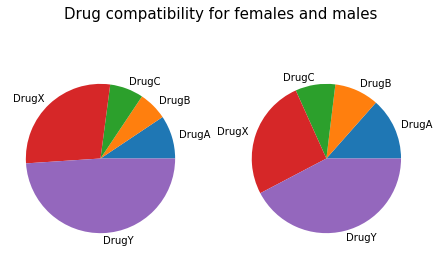

In [5]:
fig, axs = plt.subplots(1,2, constrained_layout =True)
fig.suptitle('Drug compatibility for females and males', fontsize =15)

dataset_female=dataset.loc[dataset['Sex']==1]
dataset_female
DrugY=dataset_female.loc[dataset_female['Drug']==4].shape[0]
DrugX=dataset_female.loc[dataset_female['Drug']==3].shape[0]
DrugC=dataset_female.loc[dataset_female['Drug']==2].shape[0]
DrugB=dataset_female.loc[dataset_female['Drug']==1].shape[0]
DrugA=dataset_female.loc[dataset_female['Drug']==0].shape[0]


Drug_count_female=np.array([DrugA,DrugB,DrugC,DrugX,DrugY])
Drugs=["DrugA","DrugB","DrugC","DrugX","DrugY"]
ax =axs[0]
ax.pie(Drug_count_female, labels = Drugs)


dataset_male=dataset.loc[dataset['Sex']==0]
dataset_male
DrugY=dataset_male.loc[dataset_male['Drug']==4].shape[0]
DrugX=dataset_male.loc[dataset_male['Drug']==3].shape[0]
DrugC=dataset_male.loc[dataset_male['Drug']==2].shape[0]
DrugB=dataset_male.loc[dataset_male['Drug']==1].shape[0]
DrugA=dataset_male.loc[dataset_male['Drug']==0].shape[0]

Drug_count_male=np.array([DrugA,DrugB,DrugC,DrugX,DrugY])
Drugs=["DrugA","DrugB","DrugC","DrugX","DrugY"]
ax = axs[1]
ax.pie(Drug_count_male, labels = Drugs)


plt.show()

In [6]:
dataset['Age'].max()


74.0

In [7]:
dataset['Age'].min()

15.0

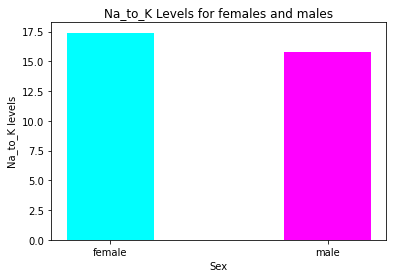

In [8]:
dataset_female=dataset.loc[dataset['Sex']==1]
dataset_female
Na_to_K_female=dataset_female['Na_to_K'].mean()


dataset_male=dataset.loc[dataset['Sex']==0]
dataset_male
Na_to_K_male=dataset_male['Na_to_K'].mean()

X=['female','male']
X_axis=np.arange(len(X))

Na_to_K_plot=[Na_to_K_female,Na_to_K_male]
plt.bar(X_axis,Na_to_K_plot , 0.4,align='center', color=['cyan','magenta'])

  
plt.xticks(X_axis, X)
plt.xlabel('Sex')
plt.ylabel("Na_to_K levels")
plt.title("Na_to_K Levels for females and males")
plt.show()

In [9]:
age_15=dataset[(dataset['Age'] >= 15) & (dataset['Age']<25)]
age_15_mean=age_15['Na_to_K'].mean()

age_25=dataset[(dataset['Age'] >= 25) & (dataset['Age']<35)]
age_25_mean=age_25['Na_to_K'].mean()


age_35=dataset[(dataset['Age'] >= 35) & (dataset['Age']<45)]
age_35_mean=age_35['Na_to_K'].mean()


age_45=dataset[(dataset['Age'] >= 45) & (dataset['Age']<55)]
age_45_mean=age_45['Na_to_K'].mean()

age_55=dataset[(dataset['Age'] >= 55)]
age_55_mean=age_55['Na_to_K'].mean()

Na_to_K_mean=[age_15_mean,age_25_mean,age_35_mean,age_45_mean,age_45_mean]

X=['15-25','25-35','35-45','45-55','>55']
X_axis=np.arange(len(X))

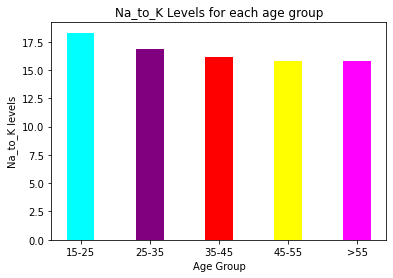

In [10]:
plt.bar(X_axis,Na_to_K_mean , 0.4, color=['cyan','purple','red','yellow','magenta'])

  
plt.xticks(X_axis, X)
plt.xlabel('Age Group')
plt.ylabel("Na_to_K levels")
plt.title("Na_to_K Levels for each age group")
plt.show()

In [11]:
age_15=dataset[(dataset['Age'] >= 15) & (dataset['Age']<25)]
age_15_high=age_15.loc[age_15['Cholesterol']==1].shape[0]
age_15_low=age_15.loc[age_15['Cholesterol']==0].shape[0]

age_25=dataset[(dataset['Age'] >= 25) & (dataset['Age']<35)]
age_25_high=age_25.loc[age_25['Cholesterol']==1].shape[0]
age_25_low=age_25.loc[age_25['Cholesterol']==0].shape[0]

age_35=dataset[(dataset['Age'] >= 35) & (dataset['Age']<45)]
age_35_high=age_35.loc[age_35['Cholesterol']==1].shape[0]
age_35_low=age_35.loc[age_35['Cholesterol']==0].shape[0]

age_45=dataset[(dataset['Age'] >= 45) & (dataset['Age']<55)]
age_45_high=age_45.loc[age_45['Cholesterol']==1].shape[0]
age_45_low=age_45.loc[age_45['Cholesterol']==0].shape[0]

age_55=dataset[(dataset['Age'] >= 55)]
age_55_high=age_55.loc[age_55['Cholesterol']==1].shape[0]
age_55_low=age_55.loc[age_55['Cholesterol']==0].shape[0]

Cholesterol_high=[age_15_high,age_25_high,age_35_high,age_45_high,age_55_high]
Cholesterol_low=[age_15_low,age_25_low,age_35_low,age_45_low,age_55_low]
X=['15-25','25-35','35-45','45-55','>55']
X_axis=np.arange(len(X))

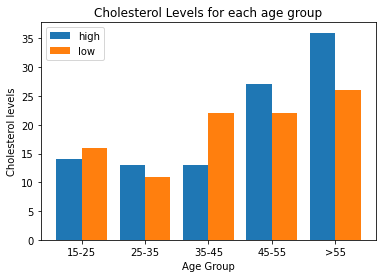

In [12]:
plt.bar(X_axis -0.2,Cholesterol_high , 0.4,label='high')
plt.bar(X_axis +0.2,Cholesterol_low , 0.4,label='low')
  
plt.xticks(X_axis, X)
plt.xlabel('Age Group')
plt.ylabel("Cholesterol levels")
plt.title("Cholesterol Levels for each age group")
plt.legend()
plt.show()

In [13]:
age_15=dataset[(dataset['Age'] >= 15) & (dataset['Age']<25)]
age_15_high=age_15.loc[age_15['BP']==2].shape[0]
age_15_normal=age_15.loc[age_15['BP']==1].shape[0]
age_15_low=age_15.loc[age_15['BP']==0].shape[0]

age_25=dataset[(dataset['Age'] >= 25) & (dataset['Age']<35)]
age_25_high=age_25.loc[age_25['BP']==2].shape[0]
age_25_normal=age_25.loc[age_25['BP']==1].shape[0]
age_25_low=age_25.loc[age_25['BP']==0].shape[0]

age_35=dataset[(dataset['Age'] >= 35) & (dataset['Age']<45)]
age_35_high=age_35.loc[age_35['BP']==2].shape[0]
age_35_normal=age_35.loc[age_35['BP']==1].shape[0]
age_35_low=age_35.loc[age_35['BP']==0].shape[0]

age_45=dataset[(dataset['Age'] >= 45) & (dataset['Age']<55)]
age_45_high=age_45.loc[age_45['BP']==2].shape[0]
age_45_normal=age_45.loc[age_45['BP']==1].shape[0]
age_45_low=age_45.loc[age_45['BP']==0].shape[0]

age_55=dataset[(dataset['Age'] >= 55)]
age_55_high=age_55.loc[age_55['BP']==2].shape[0]
age_55_normal=age_55.loc[age_55['BP']==1].shape[0]
age_55_low=age_55.loc[age_55['BP']==0].shape[0]

BP_high=[age_15_high,age_25_high,age_35_high,age_45_high,age_55_high]
BP_normal=[age_15_normal,age_25_normal,age_35_normal,age_45_normal,age_55_normal]
BP_low=[age_15_low,age_25_low,age_35_low,age_45_low,age_55_low]
X=['15-25','25-35','35-45','45-55','>55']
X_axis=np.arange(len(X))

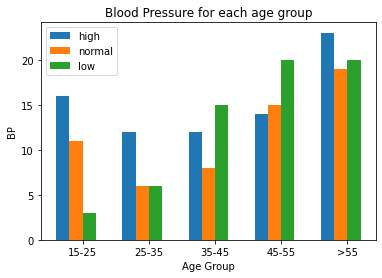

In [14]:
plt.bar(X_axis -0.3,BP_high , 0.2,label='high')
plt.bar(X_axis -0.1,BP_normal , 0.2,label='normal')
plt.bar(X_axis +0.1,BP_low , 0.2,label='low')
  
plt.xticks(X_axis, X)
plt.xlabel('Age Group')
plt.ylabel("BP")
plt.title("Blood Pressure for each age group")
plt.legend()
plt.show()

In [15]:
dataset_female=dataset.loc[dataset['Sex']==1]
dataset_female
BP_high_female=dataset_female.loc[dataset_female['BP']==2].shape[0]
BP_normal_female=dataset_female.loc[dataset_female['BP']==1].shape[0]
BP_low_female=dataset_female.loc[dataset_female['BP']==0].shape[0]


dataset_male=dataset.loc[dataset['Sex']==0]
dataset_male
BP_high_male=dataset_male.loc[dataset_male['BP']==2].shape[0]
BP_normal_male=dataset_male.loc[dataset_male['BP']==1].shape[0]
BP_low_male=dataset_male.loc[dataset_male['BP']==0].shape[0]

BP_high=[BP_high_female,BP_high_male]
BP_normal=[BP_normal_female,BP_normal_male]
BP_low=[BP_low_female,BP_low_male]

X=['female','male']
X_axis=np.arange(len(X))


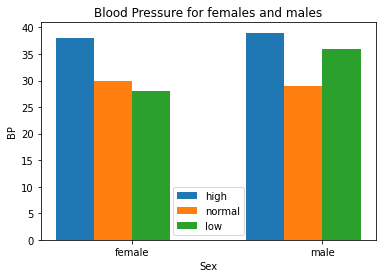

In [16]:
plt.bar(X_axis -0.3,BP_high , 0.2,label='high')
plt.bar(X_axis -0.1,BP_normal , 0.2,label='normal')
plt.bar(X_axis +0.1,BP_low , 0.2,label='low')
  
plt.xticks(X_axis, X)
plt.xlabel('Sex')
plt.ylabel("BP")
plt.title("Blood Pressure for females and males")
plt.legend()
plt.show()

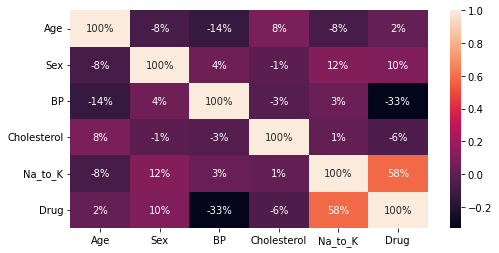

In [17]:
plt.figure(figsize=(8,4)) 
sns.heatmap(dataset.corr(),annot=True,fmt=".0%") 
plt.show()

In [18]:
x=dataset.drop('Drug',axis=1)
y=dataset['Drug']


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [ ]:
#JYOTHI SAI MOGANTI

In [ ]:
#Logistic Regression Algorithm

In [20]:
classifier = LogisticRegression(solver='lbfgs',max_iter=1500,multi_class='multinomial')
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=1500, multi_class='multinomial')

In [21]:
y_predicted=classifier.predict(x_test)
y_predicted

array([3., 4., 3., 3., 4., 4., 3., 4., 4., 4., 3., 4., 4., 4., 4., 0., 3.,
       3., 1., 4., 4., 3., 3., 3., 1., 3., 4., 4., 2., 3., 2., 4., 4., 4.,
       0., 4., 0., 4., 4., 4.])

In [22]:
rmse=sqrt(mean_squared_error(y_test,y_predicted))
print(rmse)

0.7905694150420949


In [23]:
index1=0
total_accuracy=0
for i in y_test:
    if i==y_predicted[index1]:
        total_accuracy+=1
    index1+=1
accuracy=total_accuracy/len(y_predicted)
print(accuracy)

0.825


In [24]:
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[ 3  0  0  0  1]
 [ 0  2  0  0  0]
 [ 0  0  2  1  1]
 [ 0  0  0 10  3]
 [ 0  0  0  1 16]]


In [25]:
confusion_matrix(y_test, y_predicted)

array=[3,0,0,0,1],[0,2,0,0,0],[0,0,2,1,1],[0,0,0,10,3],[0,0,0,1,16]

confmtrx = np.array(confusion_matrix(y_test, y_predicted))

pd.DataFrame(confmtrx, index=['DrugA','DrugB', 'DrugC','DrugX','DrugY'],
columns=['predicted_DrugA', 'predicted_DrugB', 'predicted_DrugC','predicted_DrugX','predicted_DrugY'])

,predicted_DrugA,predicted_DrugB,predicted_DrugC,predicted_DrugX,predicted_DrugY
DrugA,3,0,0,0,1
DrugB,0,2,0,0,0
DrugC,0,0,2,1,1
DrugX,0,0,0,10,3
DrugY,0,0,0,1,16


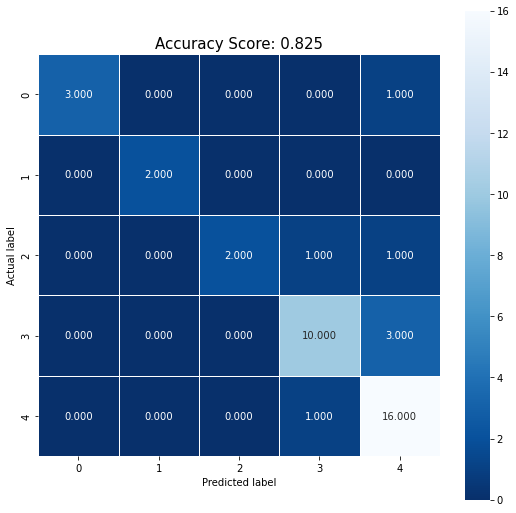

In [26]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [27]:
print('Accuracy Score:', metrics.accuracy_score(y_test, y_predicted))  


class_report=classification_report(y_test, y_predicted)
print(class_report)

Accuracy Score: 0.825
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         4
         1.0       1.00      1.00      1.00         2
         2.0       1.00      0.50      0.67         4
         3.0       0.83      0.77      0.80        13
         4.0       0.76      0.94      0.84        17

    accuracy                           0.82        40
   macro avg       0.92      0.79      0.83        40
weighted avg       0.84      0.82      0.82        40



In [ ]:
#LAKSHMI NARASIMHA REDDY GUDA

In [28]:
#Decision Tree Algorithm

In [29]:
tree1 = DecisionTreeClassifier(criterion="entropy")

tree1 = tree1.fit(x_train, y_train)

y_predicted_decisontree = tree1.predict(x_test)

print("Classification Report: \n\n",classification_report(y_test, y_predicted_decisontree))

print("Accuracy: ",accuracy_score(y_test, y_predicted_decisontree))

Classification Report: 

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         2
         2.0       1.00      0.75      0.86         4
         3.0       0.93      1.00      0.96        13
         4.0       1.00      1.00      1.00        17

    accuracy                           0.97        40
   macro avg       0.99      0.95      0.96        40
weighted avg       0.98      0.97      0.97        40

Accuracy:  0.975


In [30]:
rmse1=sqrt(mean_squared_error(y_test,y_predicted_decisontree))
print(rmse1)

0.15811388300841897


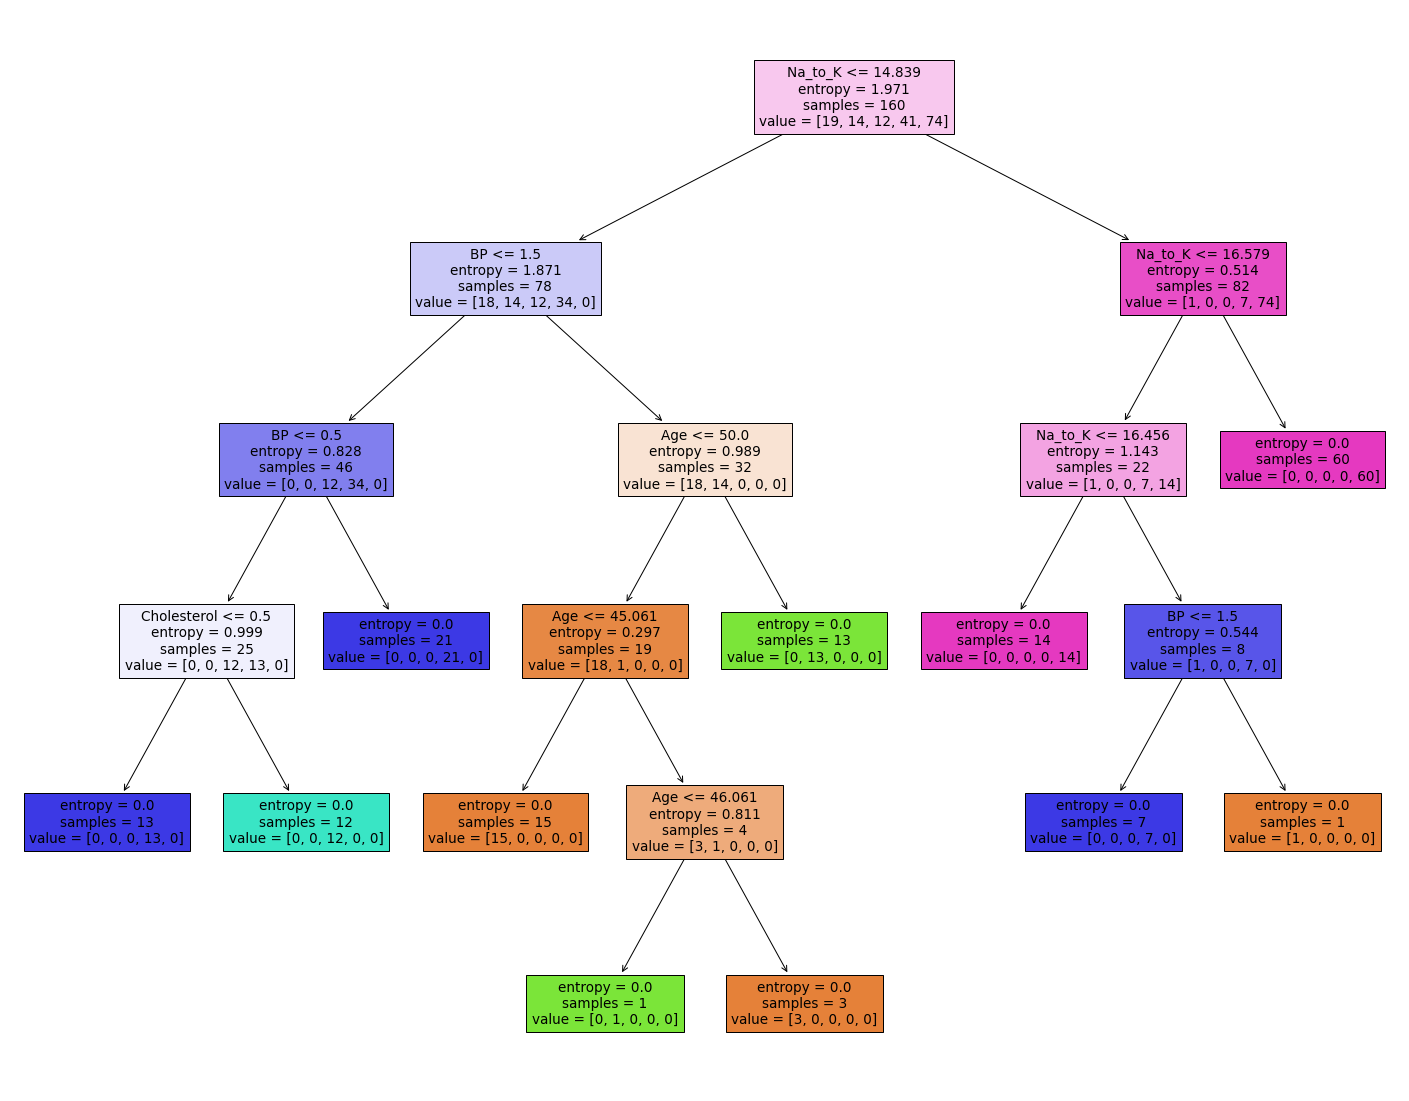

In [31]:
tree1_fig = plt.figure(figsize=(25,20))
tree_1= tree.plot_tree(tree1, 
                   feature_names=x_train.columns,  filled=True)


In [32]:
tuned_parameters = {
    'criterion': ['gini','entropy'],
    'max_leaf_nodes': range(2,11),
    "min_samples_leaf":range(2,5),
    "min_samples_split":range(2,5),
    "max_depth" : range(5,10)
}

classifier = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=tuned_parameters,scoring='accuracy',
                     cv=10,n_jobs=-1,verbose=True)

classifier.fit(x_train, y_train)

print("Best parameters values :",classifier.best_params_)



Fitting 10 folds for each of 810 candidates, totalling 8100 fits
Best parameters values : {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [33]:
#tree after pruning
pruned_classifier = DecisionTreeClassifier(criterion="gini", max_depth= 5, max_leaf_nodes= 8, min_samples_leaf= 2, min_samples_split= 2,random_state=47)
pruned_classifier = pruned_classifier.fit(x_train, y_train)

y_predicted_pruned = pruned_classifier.predict(x_test)

print("Classification report:")
print(classification_report(y_test, y_predicted_pruned))

print("Accuracy: ",accuracy_score(y_test, y_predicted_pruned))


Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         4
         1.0       1.00      1.00      1.00         2
         2.0       1.00      0.75      0.86         4
         3.0       0.87      1.00      0.93        13
         4.0       1.00      1.00      1.00        17

    accuracy                           0.95        40
   macro avg       0.97      0.90      0.93        40
weighted avg       0.96      0.95      0.95        40

Accuracy:  0.95


In [34]:
rmse_prunedtree=sqrt(mean_squared_error(y_test,y_predicted_pruned))
print(rmse_prunedtree)

0.5


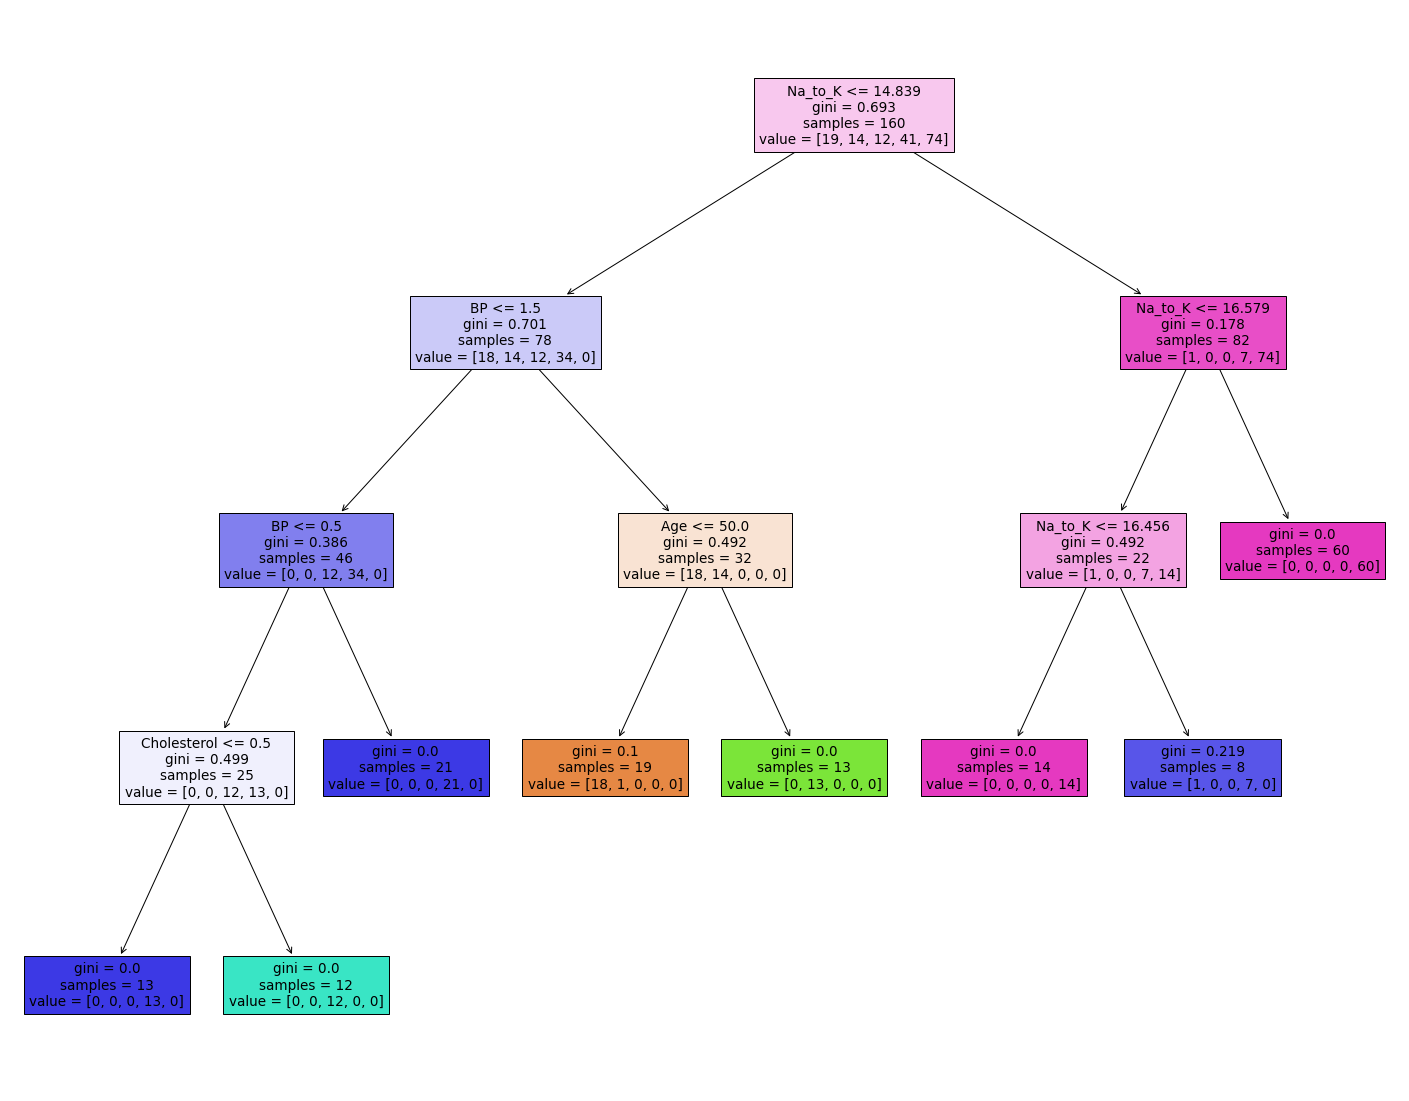

In [35]:
plt.figure(figsize=(25,20))
pruned_tree = tree.plot_tree(pruned_classifier, 
                   feature_names=x_train.columns,  filled=True)


In [36]:
pruned_cm = confusion_matrix(y_test, y_predicted_pruned)
print(pruned_cm)

[[ 3  0  0  1  0]
 [ 0  2  0  0  0]
 [ 0  0  3  1  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 17]]


In [37]:
confusion_matrix(y_test, y_predicted_pruned)

array=[3,0,0,1,0],[0,2,0,0,0],[0,0,3,1,0],[0,0,0,13,0],[0,0,0,0,17]

confmtrx_pruned = np.array(confusion_matrix(y_test, y_predicted_pruned))

pd.DataFrame(confmtrx_pruned, index=['DrugA','DrugB', 'DrugC','DrugX','DrugY'],
columns=['predicted_DrugA', 'predicted_DrugB', 'predicted_DrugC','predicted_DrugX','predicted_DrugY'])

,predicted_DrugA,predicted_DrugB,predicted_DrugC,predicted_DrugX,predicted_DrugY
DrugA,3,0,0,1,0
DrugB,0,2,0,0,0
DrugC,0,0,3,1,0
DrugX,0,0,0,13,0
DrugY,0,0,0,0,17


In [43]:
#ANIRUDH NAGENDRA SRIVATSA

In [44]:
#Random Forest Algorithm

In [38]:
random_classifier = RandomForestClassifier(n_estimators=50, max_leaf_nodes=11, n_jobs=-1, random_state=38)
random_classifier.fit(x_train, y_train)
y_predicted_randomforest=random_classifier.predict(x_test)

In [39]:
randomforest_cm = confusion_matrix(y_test, y_predicted_randomforest)
print(randomforest_cm)

[[ 3  0  0  0  1]
 [ 0  2  0  0  0]
 [ 0  0  2  1  1]
 [ 0  0  0 11  2]
 [ 0  0  0  0 17]]


In [40]:
confusion_matrix(y_test, y_predicted_randomforest)

array=[3,0,0,0,1],[0,2,0,0,0],[0,0,2,1,1],[0,0,0,11,2],[0,0,0,0,17]

confmtrx_randomforest = np.array(confusion_matrix(y_test, y_predicted_randomforest))

pd.DataFrame(confmtrx_randomforest, index=['DrugA','DrugB', 'DrugC','DrugX','DrugY'],
columns=['predicted_DrugA', 'predicted_DrugB', 'predicted_DrugC','predicted_DrugX','predicted_DrugY'])

,predicted_DrugA,predicted_DrugB,predicted_DrugC,predicted_DrugX,predicted_DrugY
DrugA,3,0,0,0,1
DrugB,0,2,0,0,0
DrugC,0,0,2,1,1
DrugX,0,0,0,11,2
DrugY,0,0,0,0,17


In [41]:
print("Classification Report: \n\n",classification_report(y_test,  y_predicted_randomforest))

print("Accuracy: ",accuracy_score(y_test,  y_predicted_randomforest))

Classification Report: 

               precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         4
         1.0       1.00      1.00      1.00         2
         2.0       1.00      0.50      0.67         4
         3.0       0.92      0.85      0.88        13
         4.0       0.81      1.00      0.89        17

    accuracy                           0.88        40
   macro avg       0.95      0.82      0.86        40
weighted avg       0.89      0.88      0.87        40

Accuracy:  0.875


In [42]:
rmse_randomforest=sqrt(mean_squared_error(y_test,y_predicted_randomforest))
print(rmse_randomforest)

0.758287544405155
